In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.seasonal import seasonal_decompose


import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
resamples = {'by_week': ['W-MON',4],
             'by_month': ['M',12]}

In [3]:
weather_df= pd.read_csv(os.path.join('generated_data','all_weather.csv'), header=[0,1], index_col=0)#, parse_dates=['date'])
#weather_df = weather_df.set_index('date')
weather_df.index= pd.to_datetime(weather_df.index)
weather_df[('country','World')]= weather_df.mean(axis=1)
weather_df.head()

country                                                       \
           Netherlands Philippines Singapore       Peru   Denmark     Italy   
date                                                                          
2017-01-01    1.729167   27.250000   27.4125  22.450000  5.645833  5.000000   
2017-01-02    3.208333   27.208333   26.5875  21.314286  0.875000  8.191489   
2017-01-03    5.375000   28.333333   26.3375  21.157143  3.306122  9.791667   
2017-01-04    6.145833   27.750000   26.7500  22.150000  1.958333  5.354167   
2017-01-05    0.708333   26.708333   27.9000  23.025000 -5.729167  5.729167   

                                                      ...            \
                Chile Lithuania  Slovakia  Indonesia  ...   Hungary   
date                                                  ...             
2017-01-01  25.357143    5.0750 -6.052632  31.444444  ... -6.711538   
2017-01-02  26.285714    1.1375 -4.540000  31.407407  ... -5.560000   
2017-01-03  23.785714   -1.9875  1.160000  30.115385  ... -0.354167   
2017-01-04  23.454545   -2.9125  3.345455  27.448276  ...  0.218182   
2017-01-05  26.285714  -13.5375 -1.041667  28.592593  ... -0.788462   

                                                                        \
            Argentina Poland  Bolivia  Guatemala   Honduras     Taiwan   
date                                                                     
2017-01-01  30.304348    NaN   9.2250        NaN  20.842857  22.642857   
2017-01-02  25.375000    NaN   9.7200  22.600000  20.612500  21.422222   
2017-01-03  25.533333    NaN  10.6250  19.533333  19.400000  20.509434   
2017-01-04  26.291667    NaN   8.7375  12.800000  20.325000  23.380952   
2017-01-05  24.826087    NaN   7.7250        NaN  19.950000  22.395833   

                                                
              Estonia CzechRepublic      World  
date                                            
2017-01-01   3.162500     -6.296296  11.250720  
2017-01-02  -2.175000     -3.458333  10.911742  
2017-01-03  -4.279167     -0.321429  11.447292  
2017-01-04  -8.895833      0.705882  11.365506  
2017-01-05 -12.326087     -3.437500   9.124424  

[5 rows x 54 columns]

In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1882 entries, 2017-01-01 to 2022-02-25
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (country, Netherlands)        1880 non-null   float64
 1   (country, Philippines)        1878 non-null   float64
 2   (country, Singapore)          1880 non-null   float64
 3   (country, Peru)               1880 non-null   float64
 4   (country, Denmark)            1880 non-null   float64
 5   (country, Italy)              1880 non-null   float64
 6   (country, Chile)              1825 non-null   float64
 7   (country, Lithuania)          1880 non-null   float64
 8   (country, Slovakia)           1880 non-null   float64
 9   (country, Indonesia)          1706 non-null   float64
 10  (country, Norway)             1880 non-null   float64
 11  (country, Mexico)             1852 non-null   float64
 12  (country, Japan)              1880 non-null 

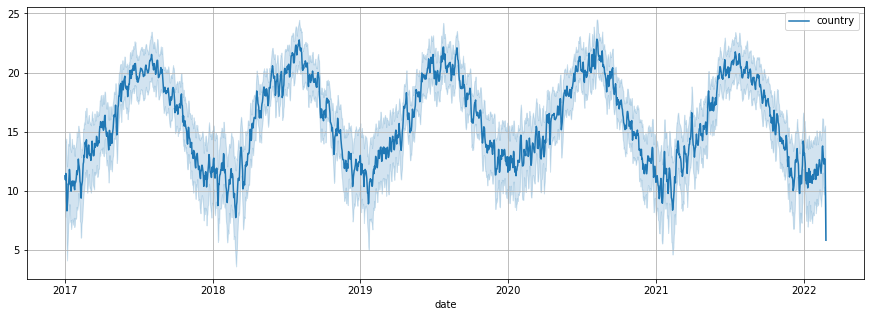

In [5]:
import seaborn as sns

plt.figure(figsize = (15,5))
plt.grid(True)

sns.lineplot(data=weather_df);

### Read songs' features

In [6]:
mood_features= 'danceability valence energy'.split()

In [7]:
ranking_features_df= pd.read_csv(os.path.join('generated_data', 'ranking_features.csv'), index_col=0, parse_dates=['Date', 'release_date'])

In [8]:
ranking_features_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date,danceability,valence,energy,id
0,1,Échame La Culpa,"Luis Fonsi, Demi Lovato",26459,1zsG4eaZmkA1dvjDDsAGLK,2018-01-01,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
1,2,Échame La Culpa,"Luis Fonsi, Demi Lovato",24103,1zsG4eaZmkA1dvjDDsAGLK,2018-01-02,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
2,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24702,1zsG4eaZmkA1dvjDDsAGLK,2018-01-03,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
3,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24584,1zsG4eaZmkA1dvjDDsAGLK,2018-01-04,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
4,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",25531,1zsG4eaZmkA1dvjDDsAGLK,2018-01-05,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK


In [9]:
ranking_features_df['Region'].unique()

array(['Ecuador', 'Portugal', 'Panama', 'Italy', 'Germany', 'Finland',
       'Estonia', 'Hungary', 'Spain', 'Peru', 'Slovakia', 'Ireland',
       'Indonesia', 'Iceland', 'Brazil', 'Canada', 'Belgium', 'Uruguay',
       'CostaRica', 'Malaysia', 'Mexico', 'France', 'Argentina', 'Norway',
       'Lithuania', 'Philippines', 'Taiwan', 'NewZealand', 'Turkey',
       'USA', 'ElSalvador', 'Chile', 'Japan', 'Honduras', 'Guatemala',
       'Switzerland', 'Denmark', 'Bolivia', 'Poland', 'Austria', 'Sweden',
       'CzechRepublic', 'Netherlands', 'Columbia', 'Singapore',
       'DominicanRepublic', 'UnitedKingdom', 'World', 'Paraguay',
       'Australia', 'Latvia', 'Greece', 'HongKong', 'Luxemborg'],
      dtype=object)

In [10]:
ranking_features_df['Date'].min(), ranking_features_df['Date'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2022-02-22 00:00:00'))

In [11]:
def plot_weather_and_song_features(song_feat_df, weather_df, country, features):
    country_weather_ts= weather_df[('country',country)]
    
    country_df = ranking_features_df[ranking_features_df['Region']==country]
    daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
                                    
    f, axes = plt.subplots(len(features), 1, figsize=(20,15), sharey='row', sharex='col')
    axe = axes.ravel()
    i=0
    for c in features:
        df = daily_country_df[c].to_frame()
        df['weather']= country_weather_ts
       
        ax2 = axe[i].twinx()
                                     
        corr_= df.dropna().corr().loc[c,'weather']                             
                                     
        df[c].plot(ax=axe[i], color='blue', title=f'Country: {country}. Feature: {c}. Corr: {corr_}');
        df['weather'].plot(ax=ax2, grid=True, color='red');  
        
        i= i+1
                                     

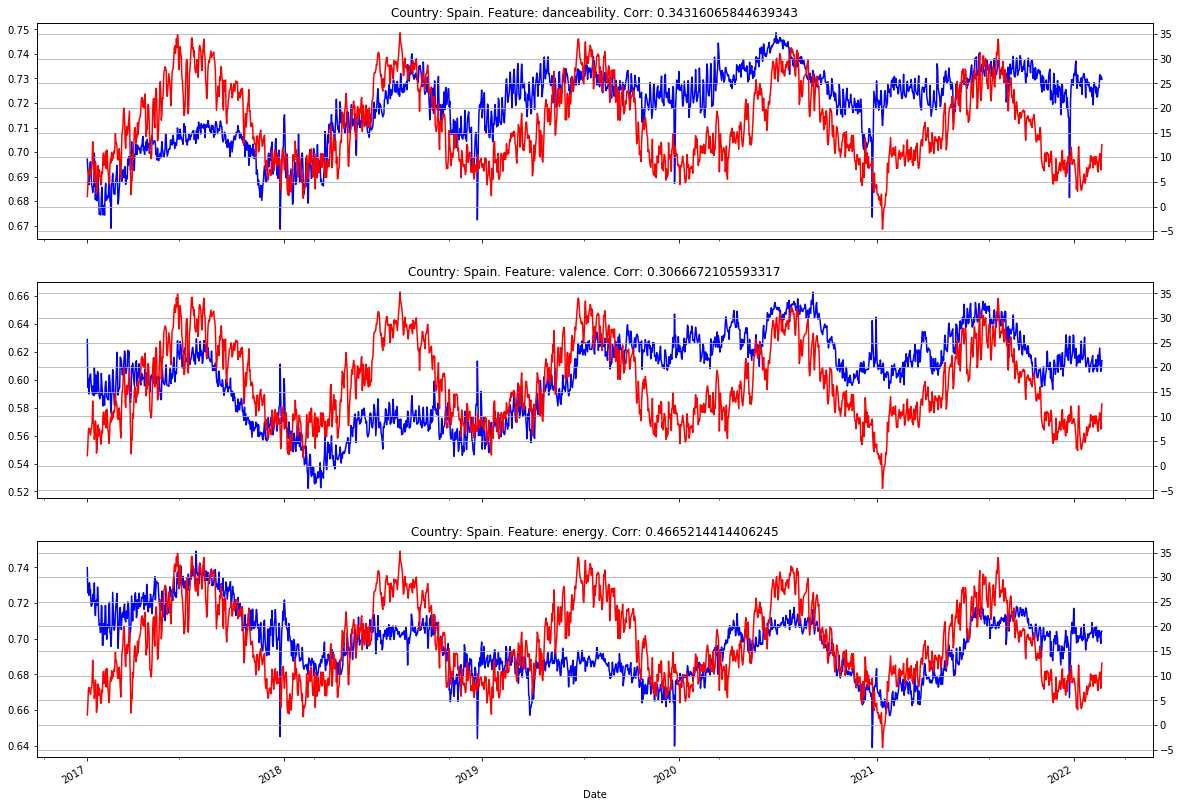

In [12]:
plot_weather_and_song_features(ranking_features_df, weather_df, 'Spain', mood_features)

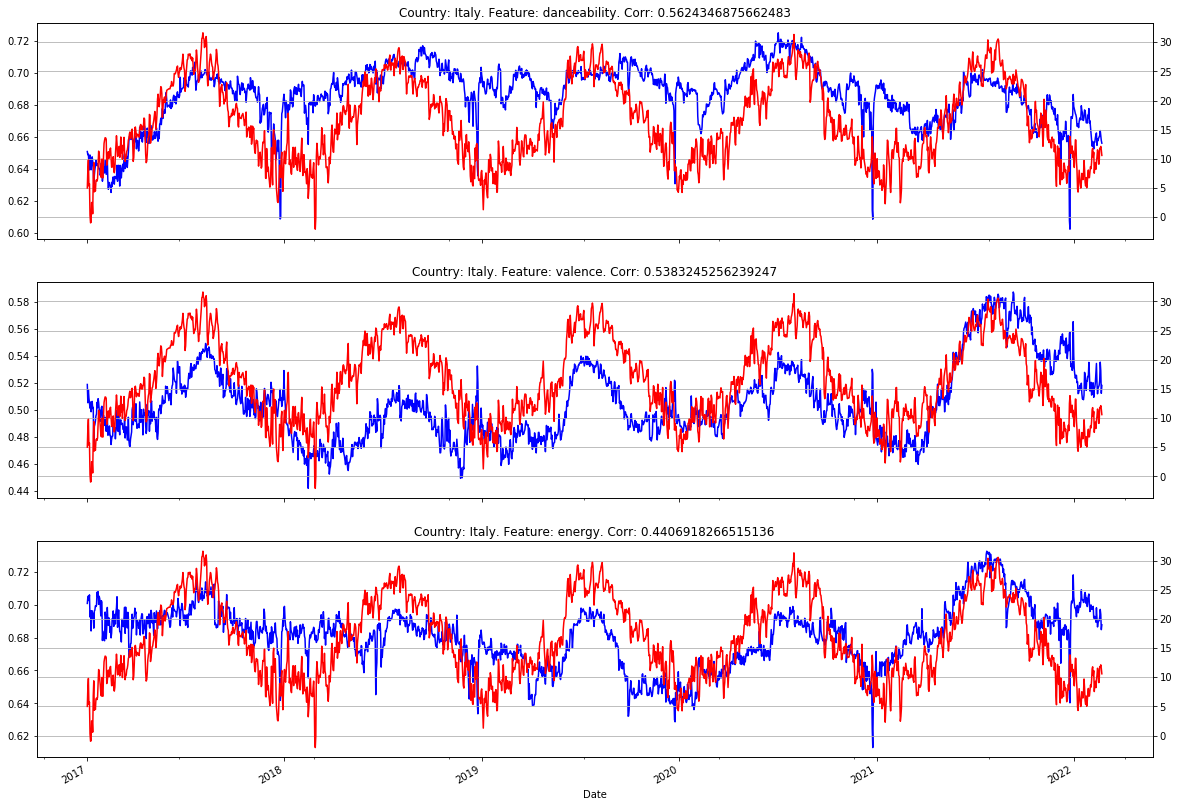

In [13]:
plot_weather_and_song_features(ranking_features_df, weather_df, 'Italy', mood_features)

## Correlation study

In [14]:
def compute_corelations(song_feat_df, weather_df, features):

    corr_dict = []

    for c in tqdm(song_feat_df['Region'].unique(), desc='Country'):
        try:
            f_dict= {} 
            f_dict['country']=c

            country_weather_ts= weather_df[('country',c)]  

            country_df = song_feat_df[song_feat_df['Region']==c]
            daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()

            for f in features:      

                df = daily_country_df[f].to_frame()
                df['weather']=country_weather_ts
                df= df.dropna(axis=0)
                #print(df)
                mis_= mutual_info_regression(df['weather'].to_numpy().reshape(-1,1),df[f].to_numpy().reshape(-1,1))


                corr_= df.dropna().corr().loc[f,'weather']                             
                f_dict[f'pcc_{f}']= corr_
                f_dict[f'mis_{f}']= mis_[0]

            corr_dict.append(f_dict)
        except:
            print(f"No correlation for: {c}")
    
    return pd.DataFrame(corr_dict)
        
all_corr_df= compute_corelations(ranking_features_df, weather_df, mood_features)        

Country:   0%|          | 0/54 [00:00<?, ?it/s]

No correlation for: Poland


In [15]:
all_corr_df.describe()

,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.199087,0.106930,0.180810,0.094411,0.224511,0.123763
std,0.181942,0.073453,0.165995,0.067879,0.162779,0.068375
min,-0.294450,0.000000,-0.315894,0.000000,-0.210079,0.000000
25%,0.066258,0.046476,0.052582,0.049573,0.112523,0.069079
50%,0.218697,0.102218,0.178949,0.088762,0.256370,0.118343
75%,0.343636,0.155191,0.279760,0.110178,0.337902,0.189343
max,0.562435,0.357212,0.594653,0.364905,0.500302,0.247250


PCC

In [16]:
all_corr_df.sort_values(by='pcc_danceability', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
3,Italy,0.562435,0.357212,0.538325,0.364905,0.440692,0.246925
28,Turkey,0.472934,0.227360,0.322194,0.115820,0.298665,0.199190
23,Norway,0.449053,0.214101,0.498251,0.211687,0.500302,0.216486
5,Finland,0.420899,0.237860,0.594653,0.300659,0.372279,0.233985
24,Lithuania,0.411683,0.176797,0.122553,0.143378,0.227968,0.151119
35,Switzerland,0.404184,0.157330,0.277787,0.088762,0.356449,0.142259
26,Taiwan,0.402288,0.105633,0.303644,0.097318,0.196800,0.058918
36,Denmark,0.399371,0.221199,0.274536,0.110178,0.485103,0.196389
6,Estonia,0.393792,0.126063,0.160125,0.090961,0.244556,0.154499
10,Slovakia,0.371430,0.120668,0.229050,0.109869,0.371452,0.191000


In [17]:
all_corr_df.sort_values(by='pcc_valence', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
5,Finland,0.420899,0.237860,0.594653,0.300659,0.372279,0.233985
3,Italy,0.562435,0.357212,0.538325,0.364905,0.440692,0.246925
23,Norway,0.449053,0.214101,0.498251,0.211687,0.500302,0.216486
39,Sweden,0.363724,0.152052,0.475453,0.160203,0.388164,0.189700
21,France,0.367664,0.155191,0.394748,0.122799,0.308669,0.116605
41,Netherlands,0.343636,0.171890,0.347517,0.180493,0.323752,0.209763
16,Belgium,0.365361,0.160075,0.343553,0.085148,0.363642,0.152520
28,Turkey,0.472934,0.227360,0.322194,0.115820,0.298665,0.199190
1,Portugal,0.262331,0.076247,0.320738,0.147913,0.256370,0.190094
50,Greece,0.283054,0.119841,0.315123,0.147400,0.337902,0.202509


In [18]:
all_corr_df.sort_values(by='pcc_energy', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
23,Norway,0.449053,0.214101,0.498251,0.211687,0.500302,0.216486
36,Denmark,0.399371,0.221199,0.274536,0.110178,0.485103,0.196389
8,Spain,0.343161,0.161010,0.306667,0.202097,0.466521,0.236874
3,Italy,0.562435,0.357212,0.538325,0.364905,0.440692,0.246925
7,Hungary,0.154541,0.128779,0.188653,0.093739,0.411213,0.184522
39,Sweden,0.363724,0.152052,0.475453,0.160203,0.388164,0.189700
15,Canada,0.239117,0.090476,0.155201,0.091204,0.386366,0.189343
40,CzechRepublic,0.152329,0.084431,0.223222,0.085933,0.378984,0.247250
5,Finland,0.420899,0.237860,0.594653,0.300659,0.372279,0.233985
10,Slovakia,0.371430,0.120668,0.229050,0.109869,0.371452,0.191000


Mutual info score

In [19]:
all_corr_df.sort_values(by='mis_danceability', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
3,Italy,0.562435,0.357212,0.538325,0.364905,0.440692,0.246925
5,Finland,0.420899,0.237860,0.594653,0.300659,0.372279,0.233985
28,Turkey,0.472934,0.227360,0.322194,0.115820,0.298665,0.199190
36,Denmark,0.399371,0.221199,0.274536,0.110178,0.485103,0.196389
4,Germany,0.310468,0.214888,0.049409,0.080525,0.301477,0.129318
23,Norway,0.449053,0.214101,0.498251,0.211687,0.500302,0.216486
46,World,0.269719,0.185966,0.091334,0.093127,0.200984,0.162458
24,Lithuania,0.411683,0.176797,0.122553,0.143378,0.227968,0.151119
41,Netherlands,0.343636,0.171890,0.347517,0.180493,0.323752,0.209763
9,Peru,-0.080112,0.163775,-0.134398,0.095025,0.206008,0.139917


In [20]:
all_corr_df.sort_values(by='mis_valence', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
3,Italy,0.562435,0.357212,0.538325,0.364905,0.440692,0.246925
5,Finland,0.420899,0.237860,0.594653,0.300659,0.372279,0.233985
23,Norway,0.449053,0.214101,0.498251,0.211687,0.500302,0.216486
8,Spain,0.343161,0.161010,0.306667,0.202097,0.466521,0.236874
41,Netherlands,0.343636,0.171890,0.347517,0.180493,0.323752,0.209763
39,Sweden,0.363724,0.152052,0.475453,0.160203,0.388164,0.189700
1,Portugal,0.262331,0.076247,0.320738,0.147913,0.256370,0.190094
50,Greece,0.283054,0.119841,0.315123,0.147400,0.337902,0.202509
32,Japan,0.119197,0.149871,0.182727,0.143695,0.259448,0.156720
24,Lithuania,0.411683,0.176797,0.122553,0.143378,0.227968,0.151119


In [21]:
all_corr_df.sort_values(by='mis_energy', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
40,CzechRepublic,0.152329,0.084431,0.223222,0.085933,0.378984,0.247250
3,Italy,0.562435,0.357212,0.538325,0.364905,0.440692,0.246925
8,Spain,0.343161,0.161010,0.306667,0.202097,0.466521,0.236874
5,Finland,0.420899,0.237860,0.594653,0.300659,0.372279,0.233985
23,Norway,0.449053,0.214101,0.498251,0.211687,0.500302,0.216486
41,Netherlands,0.343636,0.171890,0.347517,0.180493,0.323752,0.209763
50,Greece,0.283054,0.119841,0.315123,0.147400,0.337902,0.202509
28,Turkey,0.472934,0.227360,0.322194,0.115820,0.298665,0.199190
49,Latvia,0.218159,0.124872,0.279760,0.099306,0.255929,0.197842
36,Denmark,0.399371,0.221199,0.274536,0.110178,0.485103,0.196389


## Correlation based on trend

In [22]:
def compute_trend_based_correlations(song_feat_df, weather_df, features, resample):

    corr_dict = []

    for c in tqdm(song_feat_df['Region'].unique(), desc='Country'):
        try:
            f_dict= {} 
            f_dict['country']=c

            country_weather_ts= weather_df[('country',c)].fillna(method='ffill')
            #country_weather_ts= country_weather_ts.resample(resample[0]).mean()
            #print(country_weather_ts)
            weather_decomposition = seasonal_decompose(country_weather_ts, model='additive', period=7);


            country_df = song_feat_df[song_feat_df['Region']==c]
            daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()

            for f in features:      

                country_f_decomposition = seasonal_decompose(daily_country_df[f], model='additive', period=7);

                df = country_f_decomposition.trend.to_frame()
                df['weather']=weather_decomposition.trend
                
                corr_= df.dropna().corr().loc['trend','weather']   
                
                f_dict[f'pcc_{f}']= corr_
                
            corr_dict.append(f_dict)
        except:
            print(f"No trend-based correlation study for: {c}")
    
    df=  pd.DataFrame(corr_dict)
    df = df.set_index('country')
    return df
        
all_trend_corr_df= compute_trend_based_correlations(ranking_features_df, weather_df, mood_features, resamples['by_month'])   

Country:   0%|          | 0/54 [00:00<?, ?it/s]

No trend-based correlation study for: Turkey
No trend-based correlation study for: Guatemala
No trend-based correlation study for: Poland
No trend-based correlation study for: Columbia


In [23]:
all_trend_corr_desc= all_trend_corr_df.describe()
all_trend_corr_desc

,pcc_danceability,pcc_valence,pcc_energy
count,50.000000,50.000000,50.000000
mean,0.215864,0.200171,0.257825
std,0.211705,0.192462,0.184692
min,-0.386413,-0.417676,-0.258567
25%,0.068773,0.056947,0.161584
50%,0.266133,0.201697,0.277846
75%,0.400111,0.318176,0.400483
max,0.600250,0.664001,0.555048


In [24]:
all_trend_corr_df.sort_values(by='pcc_danceability', ascending=False)

,pcc_danceability,pcc_valence,pcc_energy
country,,,
Italy,0.600250,0.561448,0.473458
Norway,0.480452,0.550804,0.538392
Finland,0.474669,0.664001,0.417013
Lithuania,0.454597,0.134438,0.252733
Switzerland,0.453392,0.303382,0.396574
Taiwan,0.453020,0.338737,0.226958
Estonia,0.439478,0.169584,0.266573
France,0.431347,0.438080,0.357492
Slovakia,0.426365,0.243740,0.414996


In [25]:
all_trend_corr_df.sort_values(by='pcc_valence', ascending=False)

,pcc_danceability,pcc_valence,pcc_energy
country,,,
Finland,0.474669,0.664001,0.417013
Italy,0.600250,0.561448,0.473458
Norway,0.480452,0.550804,0.538392
Sweden,0.408524,0.516030,0.417939
France,0.431347,0.438080,0.357492
DominicanRepublic,0.275194,0.403900,0.199089
Netherlands,0.374872,0.399326,0.356560
Belgium,0.419049,0.382325,0.401786
Portugal,0.288497,0.349876,0.277394


In [26]:
all_trend_corr_df.sort_values(by='pcc_energy', ascending=False)

,pcc_danceability,pcc_valence,pcc_energy
country,,,
Denmark,0.425227,0.299921,0.555048
Norway,0.480452,0.550804,0.538392
Spain,0.365484,0.322485,0.503903
Italy,0.600250,0.561448,0.473458
Hungary,0.174904,0.201967,0.463268
CzechRepublic,0.190026,0.234140,0.442156
Canada,0.265573,0.175450,0.441910
Ecuador,-0.386413,-0.417676,0.420032
Sweden,0.408524,0.516030,0.417939


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


def calculate_n_clusters(X):
    range_n_clusters = [2, 3, 4, 5, 6, 8, 10, 15, 20, 25, 30]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        if X.shape[1]> 1:
            colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax2.scatter(
                X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
            )

            # Labeling the clusters
            centers = clusterer.cluster_centers_
            # Draw white circles at cluster centers
            ax2.scatter(
                centers[:, 0],
                centers[:, 1],
                marker="o",
                c="white",
                alpha=1,
                s=200,
                edgecolor="k",
            )

            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()


def plot_weather_and_song_feature(song_feat_df, weather_df, country, feature):
    country_weather_ts= weather_df[('country',country)]
    
    country_df = ranking_features_df[ranking_features_df['Region']==country]
    daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
                                    
    f, ax = plt.subplots(1, 1, figsize=(10,4), sharey='row', sharex='col')
    df = daily_country_df[feature].to_frame()
    df['weather']= country_weather_ts
       
    ax2 = ax.twinx()
    
    ax.set_xlabel('Time', fontsize=16)
    ax.set_ylabel(f'{feature}', fontsize=16, color='blue')
    ax.tick_params(axis='y', colors='blue')
    

    ax2.set_ylabel('Temperature', fontsize=16, color='red')    
    ax2.tick_params(axis='y', colors='red')
    
    df[feature].plot(ax=ax, color='blue');
    df['weather'].plot(ax=ax2, grid=True, color='red');
    plt.tight_layout()
    plt.savefig(os.path.join('figs',f'weather_vs_{feature}_{country}.png'))
    

### Danceability

For n_clusters = 2 The average silhouette_score is : 0.6346903567993989
For n_clusters = 3 The average silhouette_score is : 0.5291607560787319
For n_clusters = 4 The average silhouette_score is : 0.5831863196273293
For n_clusters = 5 The average silhouette_score is : 0.5928924908611082
For n_clusters = 6 The average silhouette_score is : 0.58888821108964
For n_clusters = 8 The average silhouette_score is : 0.5720263847752984
For n_clusters = 10 The average silhouette_score is : 0.6061831989697093
For n_clusters = 15 The average silhouette_score is : 0.6237080034152203
For n_clusters = 20 The average silhouette_score is : 0.5689291720665421
For n_clusters = 25 The average silhouette_score is : 0.5240722849171963
For n_clusters = 30 The average silhouette_score is : 0.4732020011024426


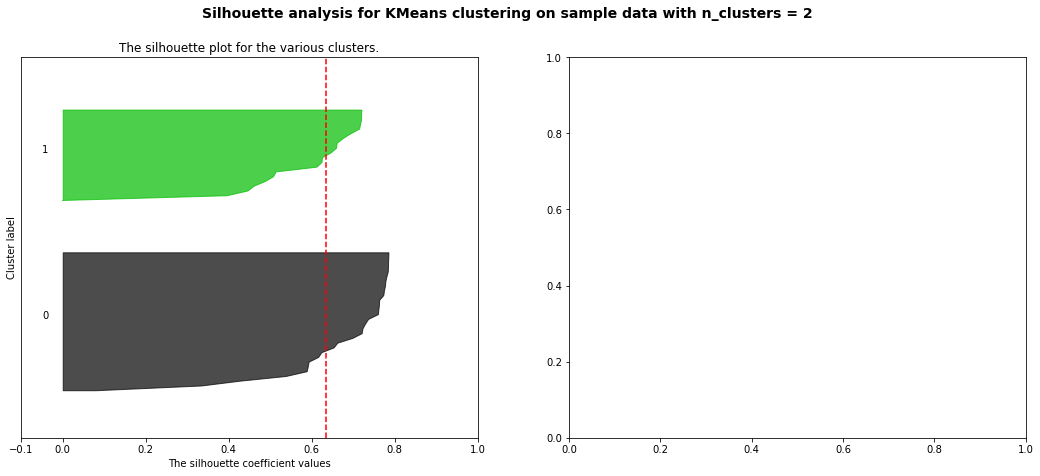

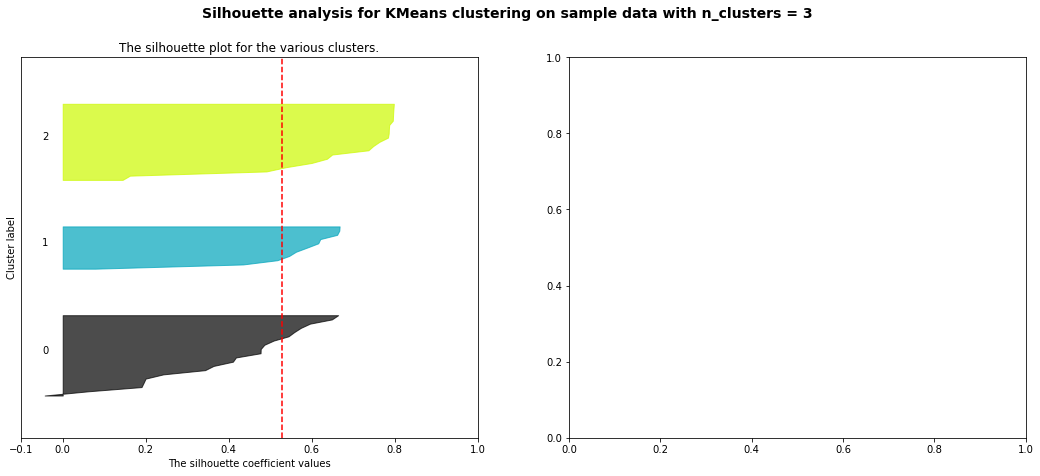

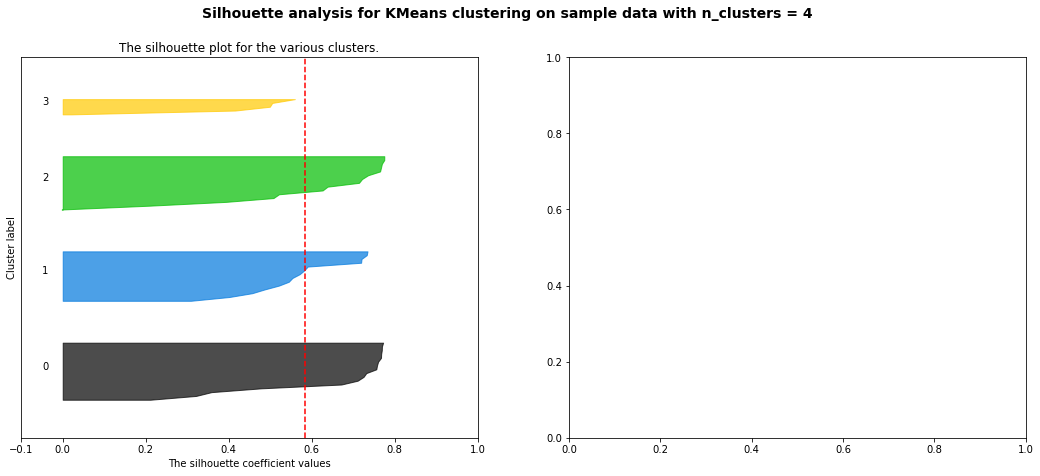

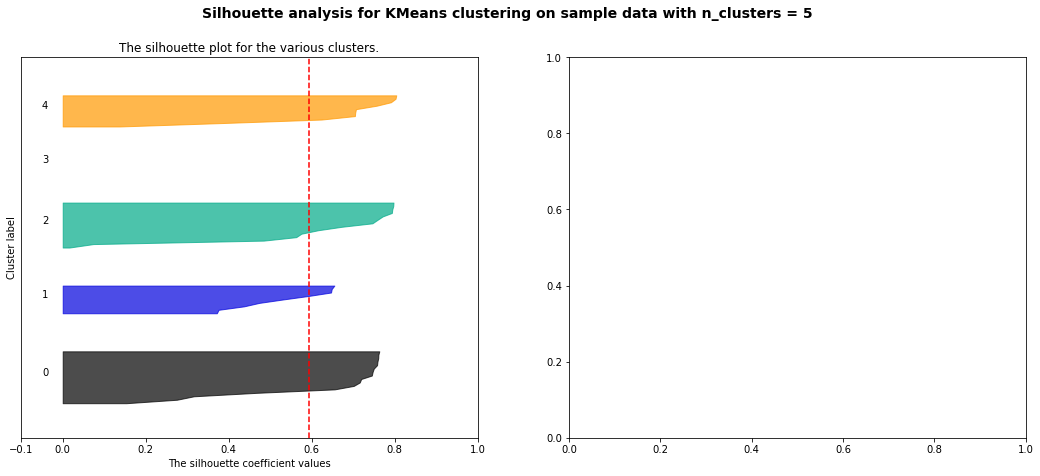

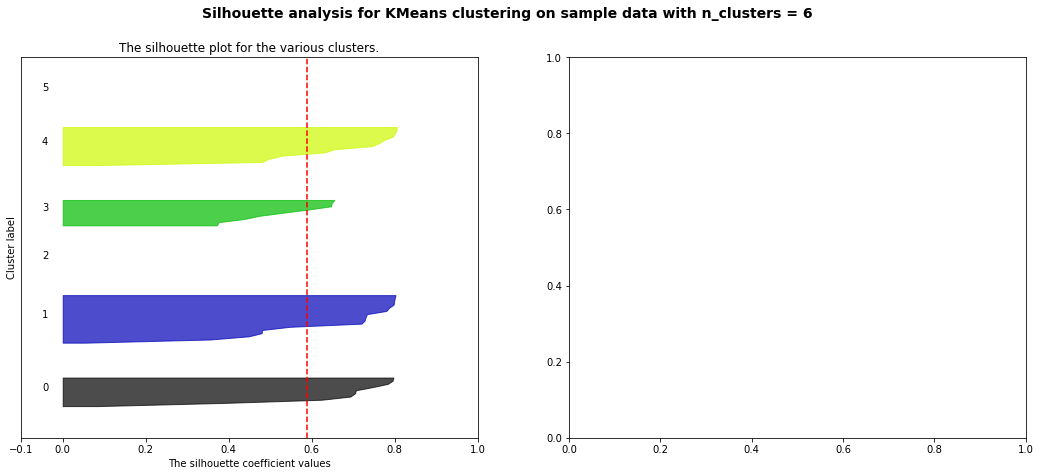

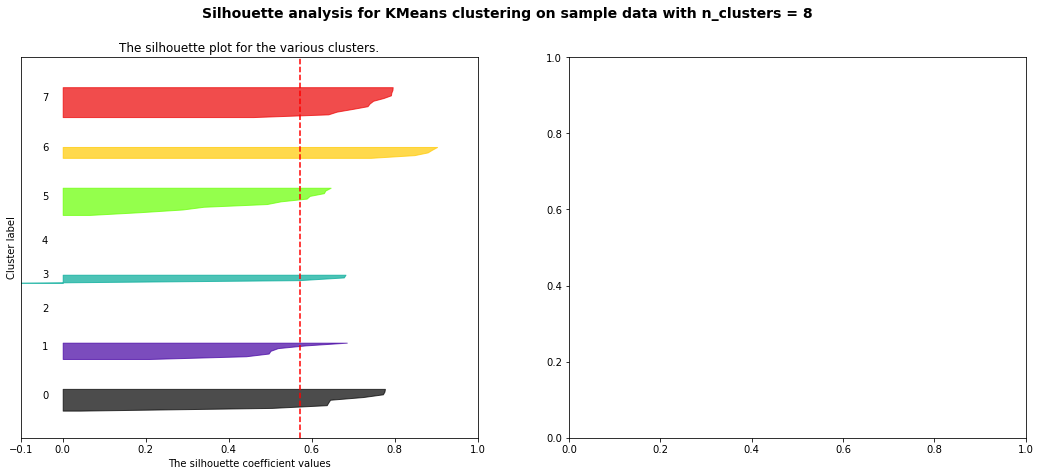

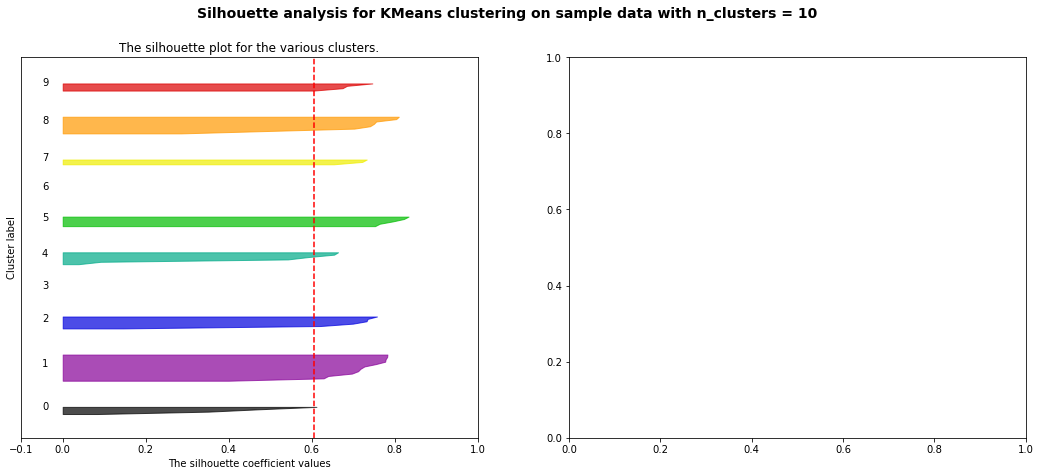

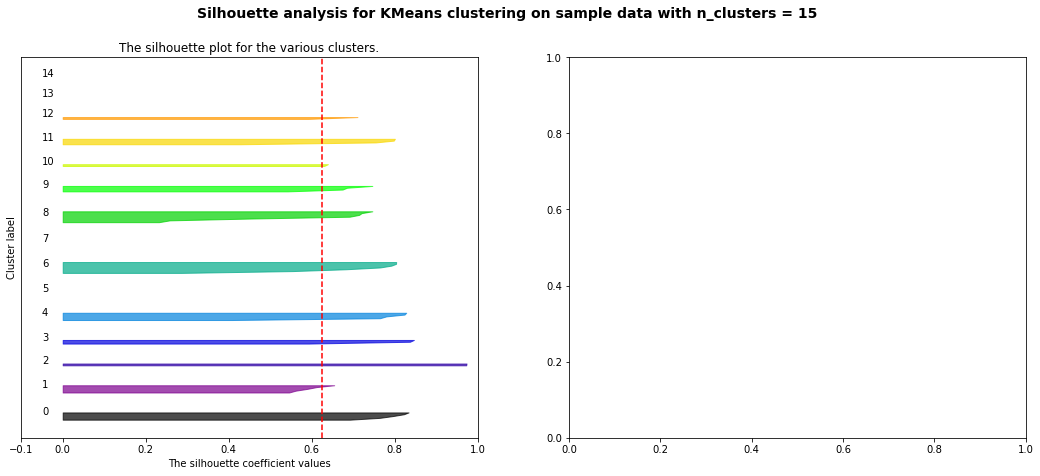

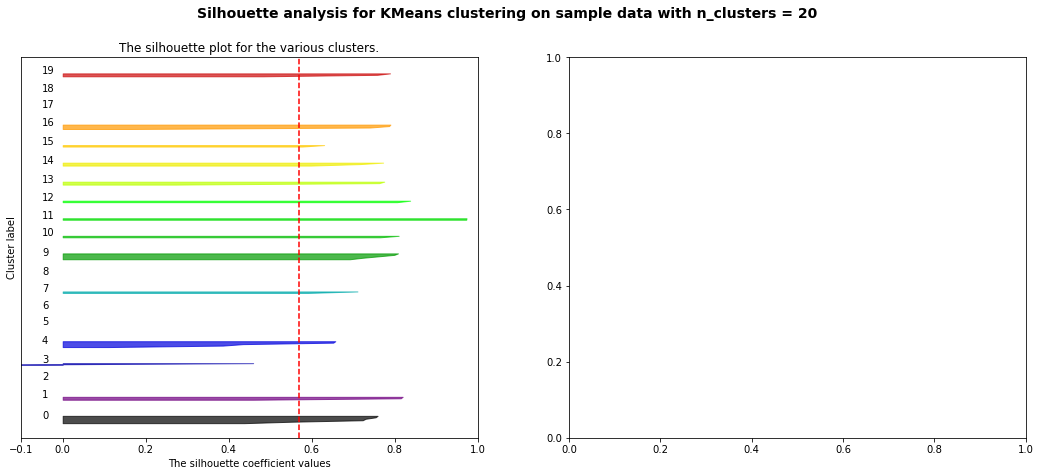

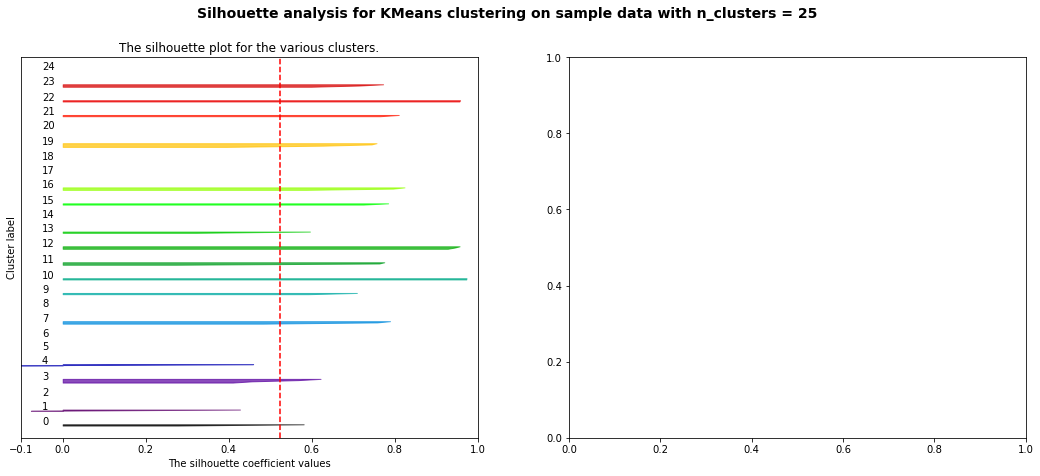

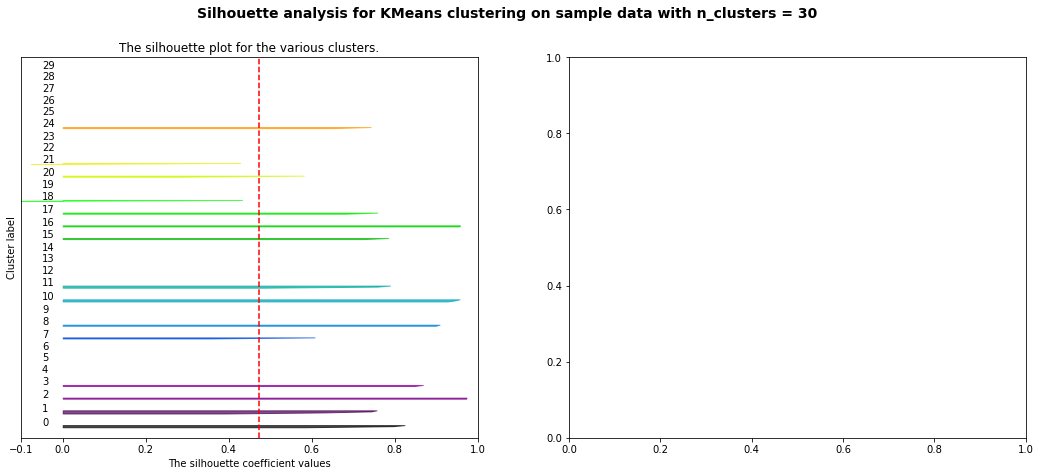

In [28]:
calculate_n_clusters(all_trend_corr_df['pcc_danceability'].values.reshape(-1,1))    

In [29]:
clusterer = KMeans(n_clusters=6, random_state=10)
cluster_labels = clusterer.fit_predict(all_trend_corr_df['pcc_danceability'].values.reshape(-1,1))

In [30]:
all_trend_corr_df['danceability_clust']= cluster_labels

In [31]:
color_dict = {0: 'purple', 1: 'red', 2: 'blue', 3: 'green', 4:'cyan', 5:'orange',
              6:'brown',7:'pink',8:'gray',9:'olive',10:'yellow',11:'black',
              12:'lightcoral', 13:'palegreen', 14:'navajowhite', 15:'slateblue', 16:'mediumorchid', 17:'darkgoldenrod',
              18:'teal', 19:'steelblue', 20:'silver'}

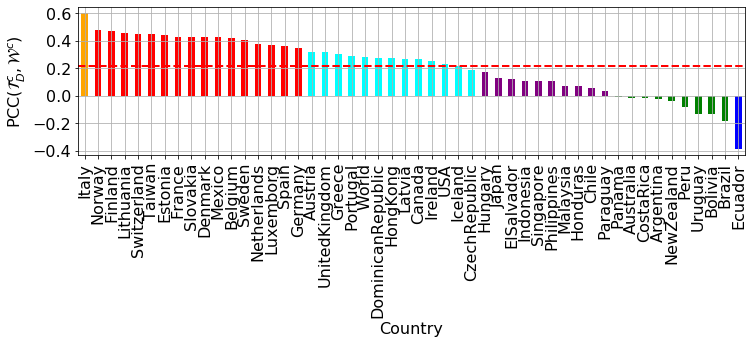

In [32]:
colors_to_plot= [color_dict[i] for i in all_trend_corr_df.sort_values(by='pcc_danceability',ascending=False)['danceability_clust']]
all_trend_corr_df['pcc_danceability'].sort_values(ascending=False).plot(kind='bar', 
                                                                        grid=True, 
                                                                        figsize=(10,4),
                                                                        color=colors_to_plot);
plt.tight_layout()
plt.xlabel("Country", fontsize = 16)
plt.ylabel('PCC($\mathcal{T}^c_D, \mathcal{W}^c$)', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=all_trend_corr_desc.loc['mean', 'pcc_danceability'], color='r', linestyle='--', lw=2)

plt.savefig(os.path.join('figs','pcc_weather_danceability.png'))

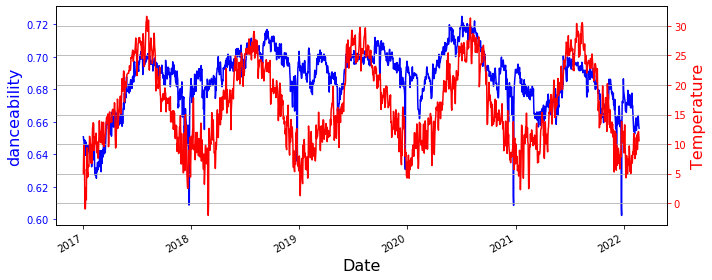

In [33]:
plot_weather_and_song_feature(ranking_features_df, weather_df, 'Italy', 'danceability')

### Valence

For n_clusters = 2 The average silhouette_score is : 0.5306685598492259
For n_clusters = 3 The average silhouette_score is : 0.5055388845082571
For n_clusters = 4 The average silhouette_score is : 0.5226670708537935
For n_clusters = 5 The average silhouette_score is : 0.5966633946158775
For n_clusters = 6 The average silhouette_score is : 0.5637841657455546
For n_clusters = 8 The average silhouette_score is : 0.5455509210918202
For n_clusters = 10 The average silhouette_score is : 0.539436887372119
For n_clusters = 15 The average silhouette_score is : 0.6286513104870532
For n_clusters = 20 The average silhouette_score is : 0.5963887580369246
For n_clusters = 25 The average silhouette_score is : 0.5549559875230431
For n_clusters = 30 The average silhouette_score is : 0.49354912982934424


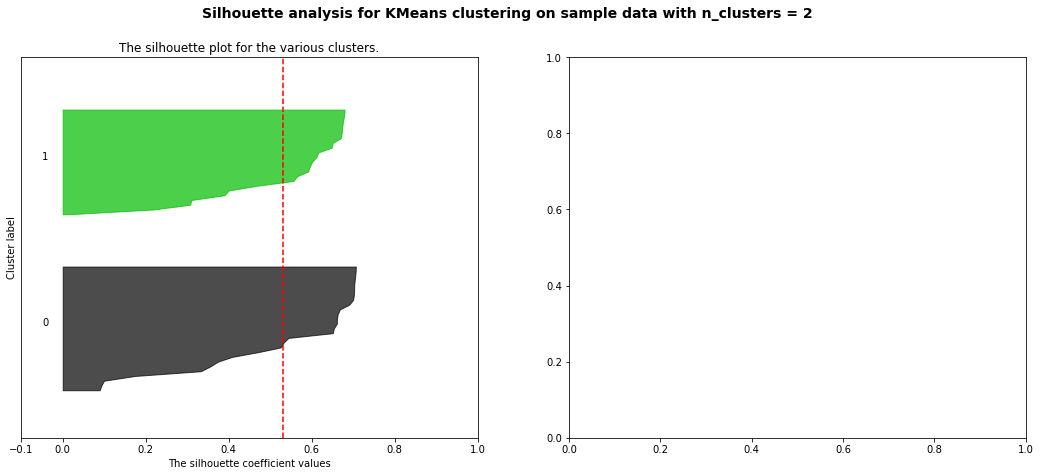

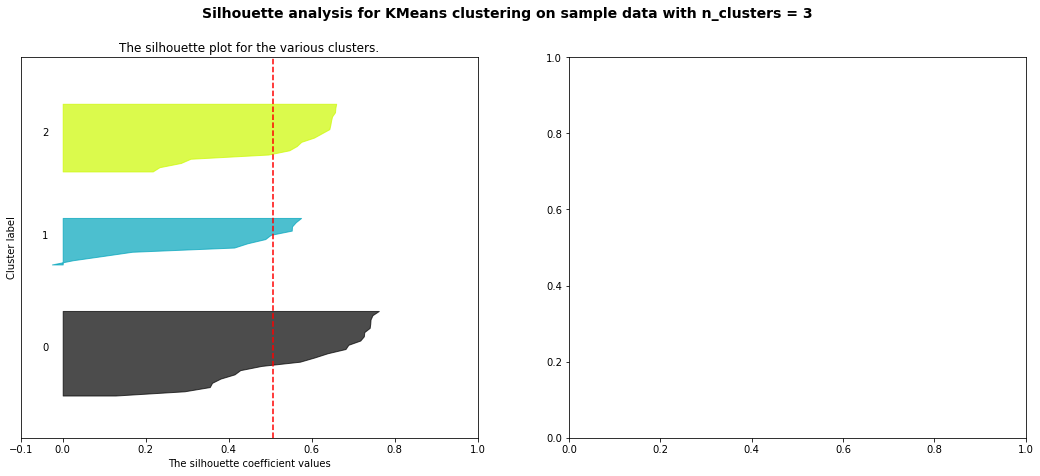

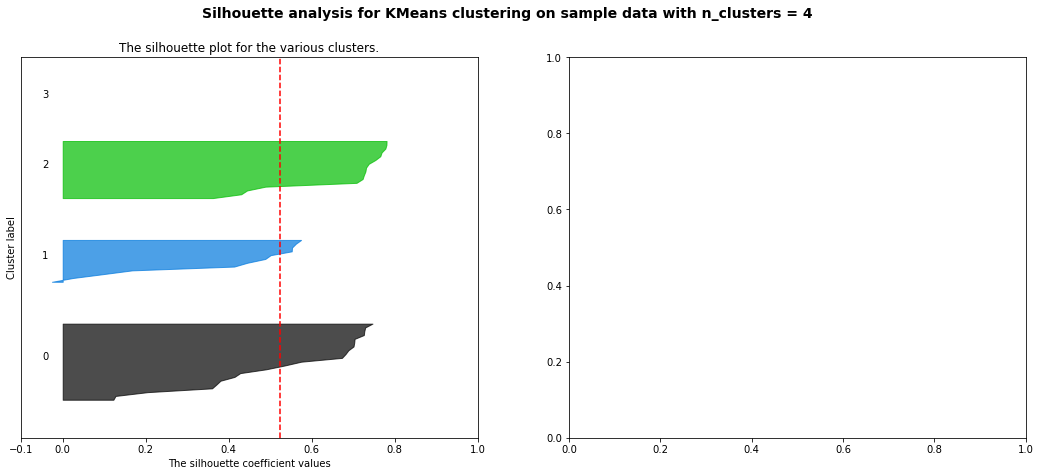

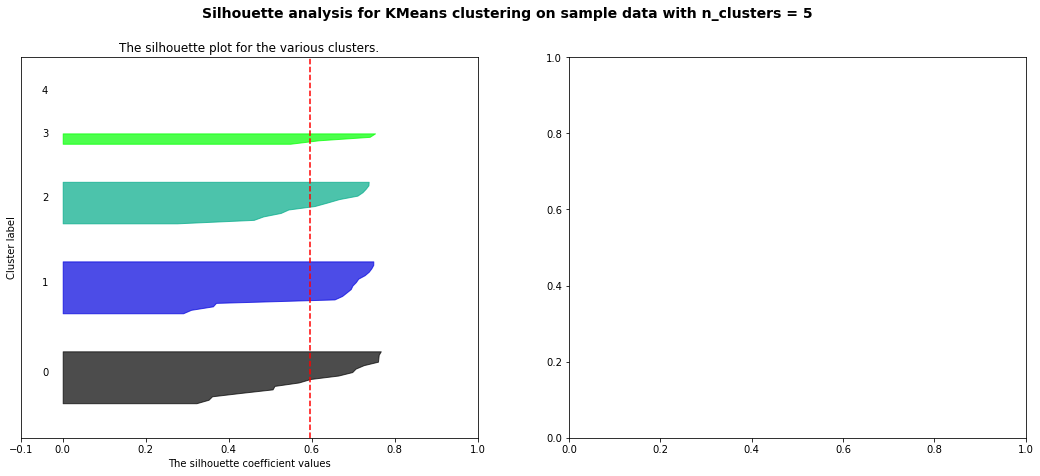

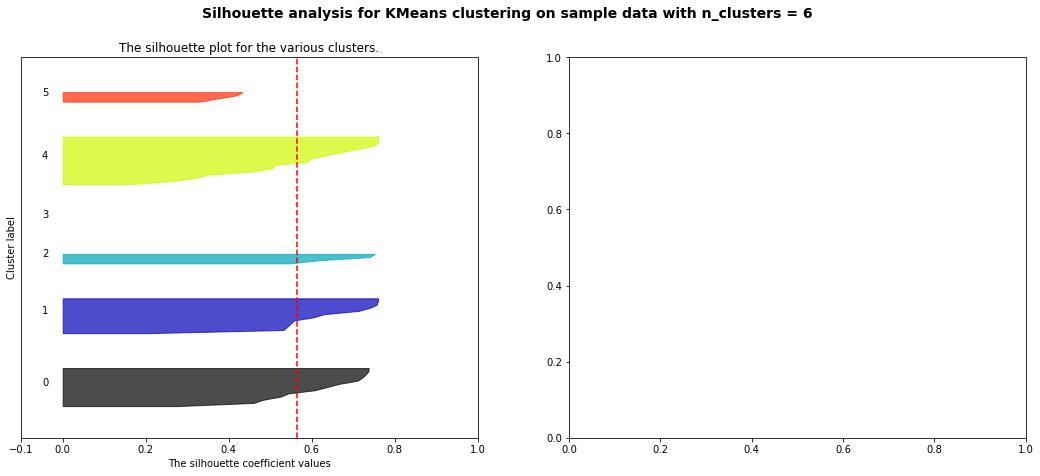

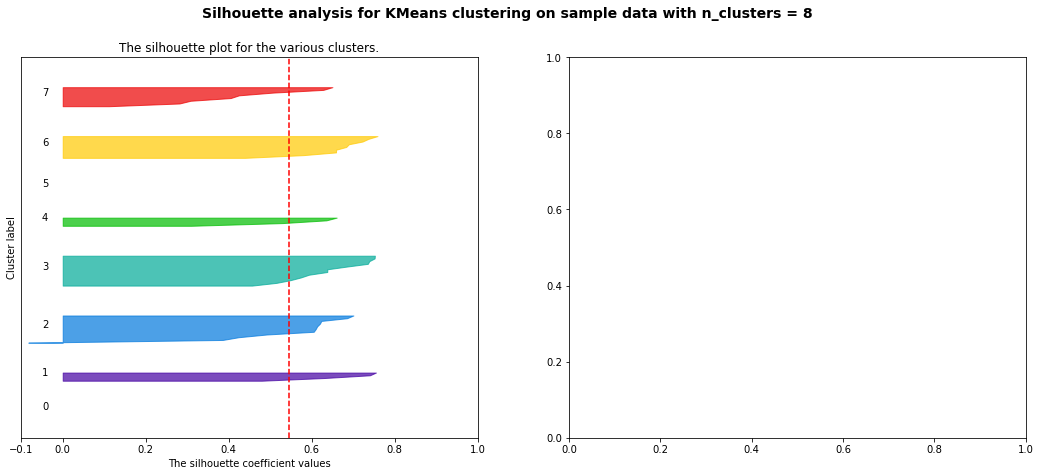

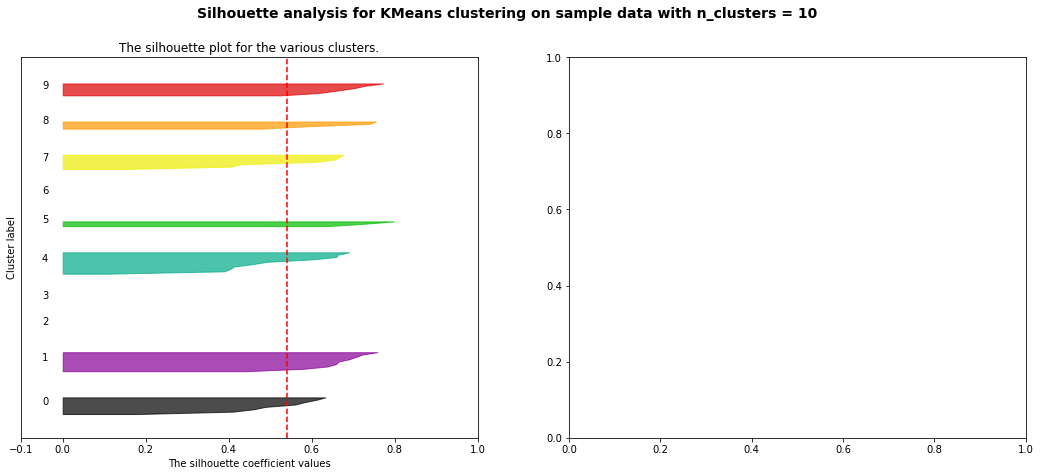

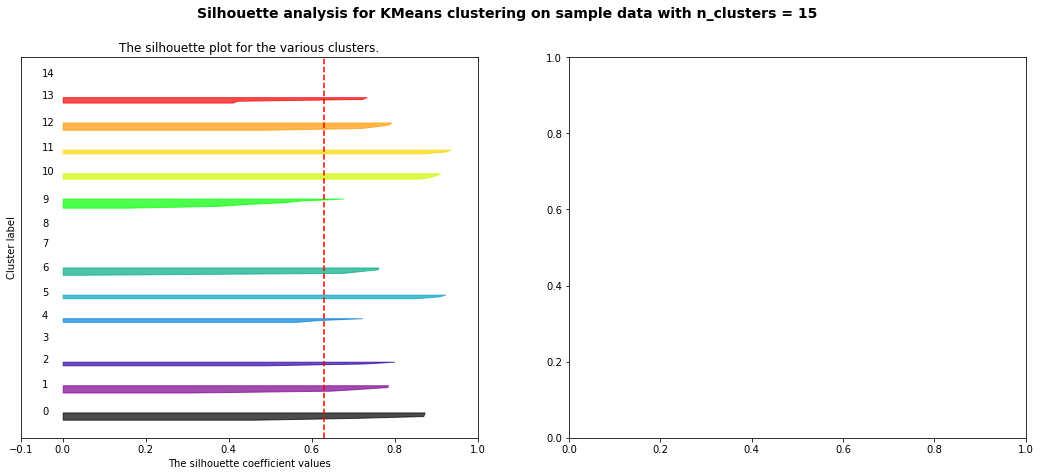

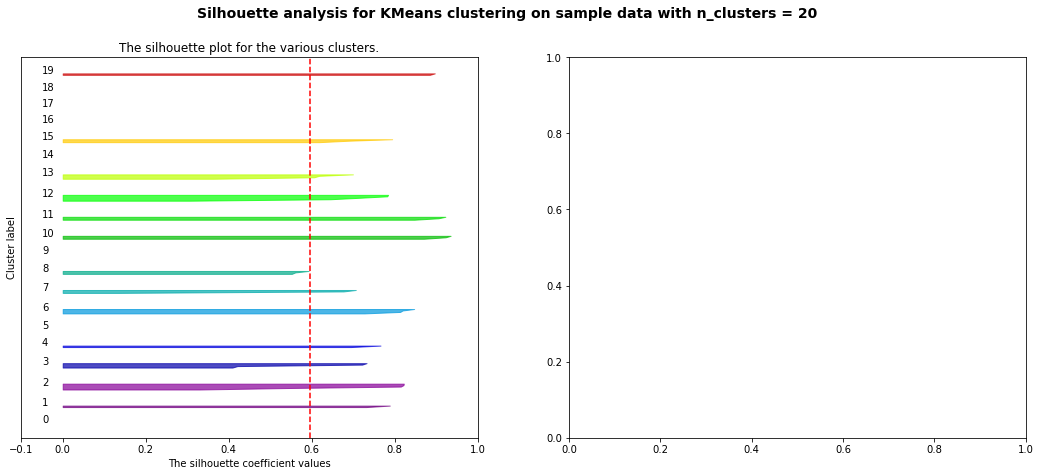

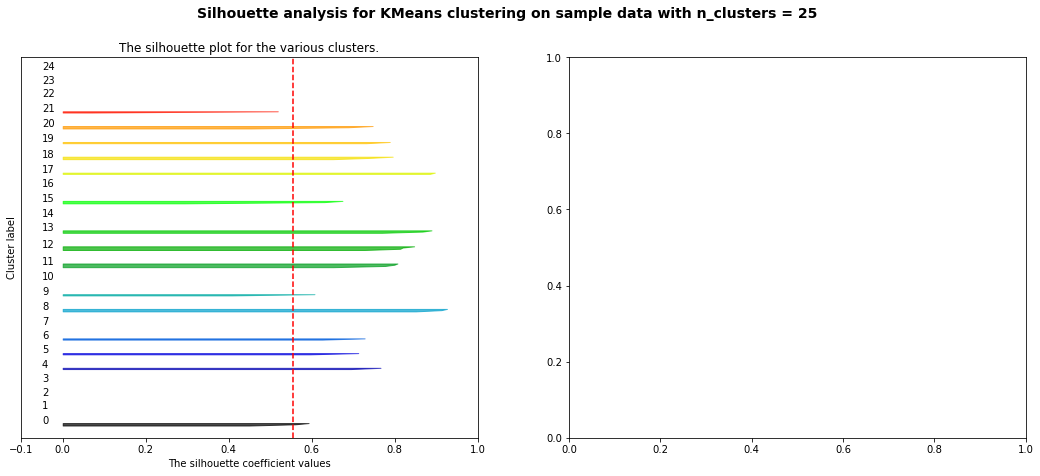

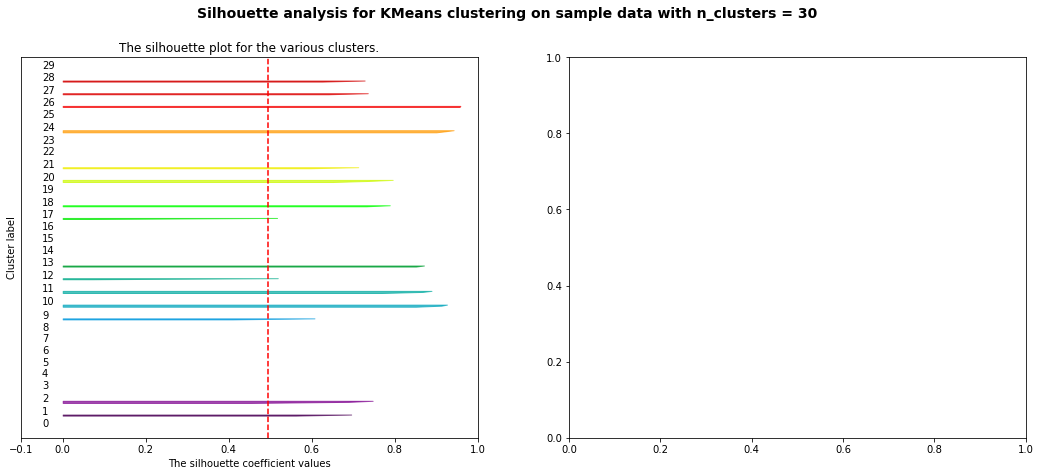

In [34]:
calculate_n_clusters(all_trend_corr_df['pcc_valence'].values.reshape(-1,1))    

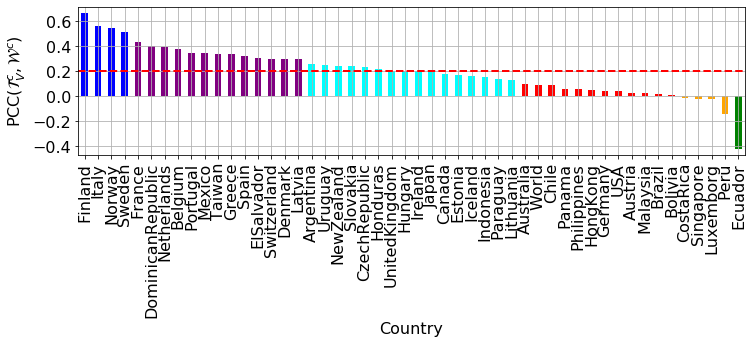

In [35]:
clusterer = KMeans(n_clusters=6, random_state=10)
cluster_labels = clusterer.fit_predict(all_trend_corr_df['pcc_valence'].values.reshape(-1,1))
all_trend_corr_df['valence_clust']= cluster_labels

colors_to_plot= [color_dict[i] for i in all_trend_corr_df.sort_values(by='pcc_valence',ascending=False)['valence_clust']]
all_trend_corr_df['pcc_valence'].sort_values(ascending=False).plot(kind='bar', 
                                                                        grid=True, 
                                                                        figsize=(10,4),
                                                                        color=colors_to_plot);
plt.tight_layout()
plt.xlabel("Country", fontsize = 16)
plt.ylabel('PCC($\mathcal{T}^c_V, \mathcal{W}^c$)', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=all_trend_corr_desc.loc['mean', 'pcc_valence'], color='r', linestyle='--', lw=2)

plt.savefig(os.path.join('figs','pcc_weather_valence.png'))

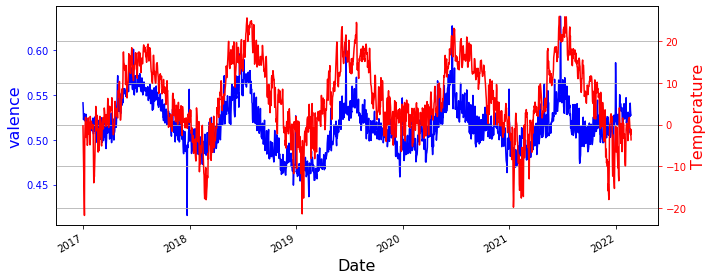

In [36]:
plot_weather_and_song_feature(ranking_features_df, weather_df, 'Finland', 'valence')

### Energy

For n_clusters = 2 The average silhouette_score is : 0.5809485391234772
For n_clusters = 3 The average silhouette_score is : 0.6127321477384038
For n_clusters = 4 The average silhouette_score is : 0.591196921670898
For n_clusters = 5 The average silhouette_score is : 0.5587238850661135
For n_clusters = 6 The average silhouette_score is : 0.5653688065700784
For n_clusters = 8 The average silhouette_score is : 0.5528146996201299
For n_clusters = 10 The average silhouette_score is : 0.565213632436639
For n_clusters = 15 The average silhouette_score is : 0.581449816884186
For n_clusters = 20 The average silhouette_score is : 0.5752513448816752
For n_clusters = 25 The average silhouette_score is : 0.5001187264838114
For n_clusters = 30 The average silhouette_score is : 0.46819460939913154


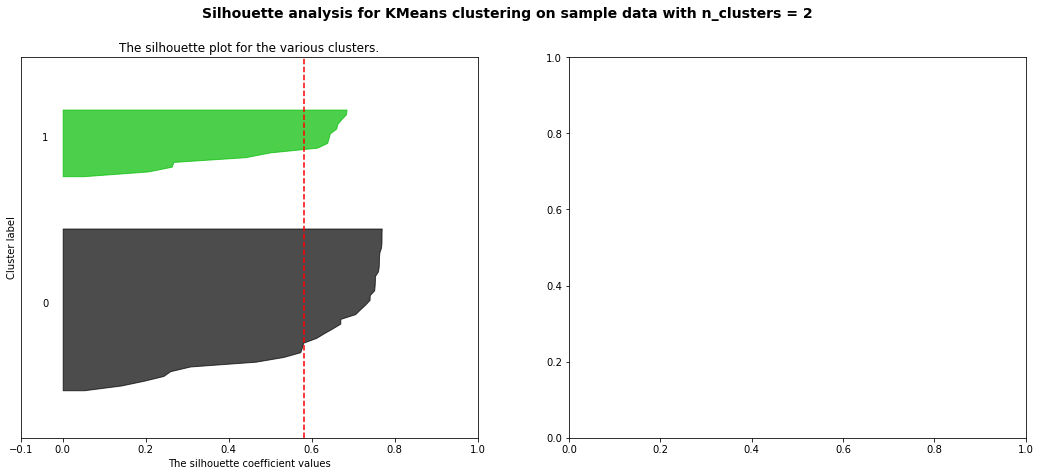

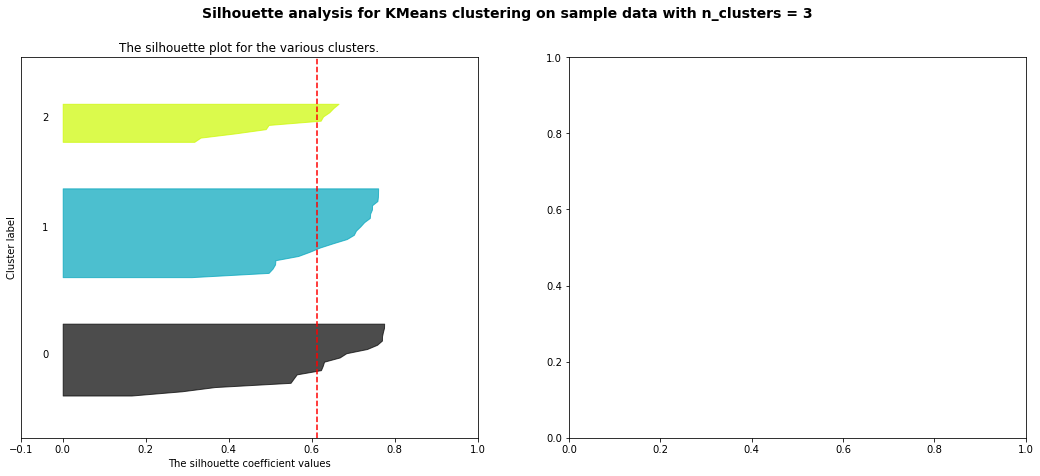

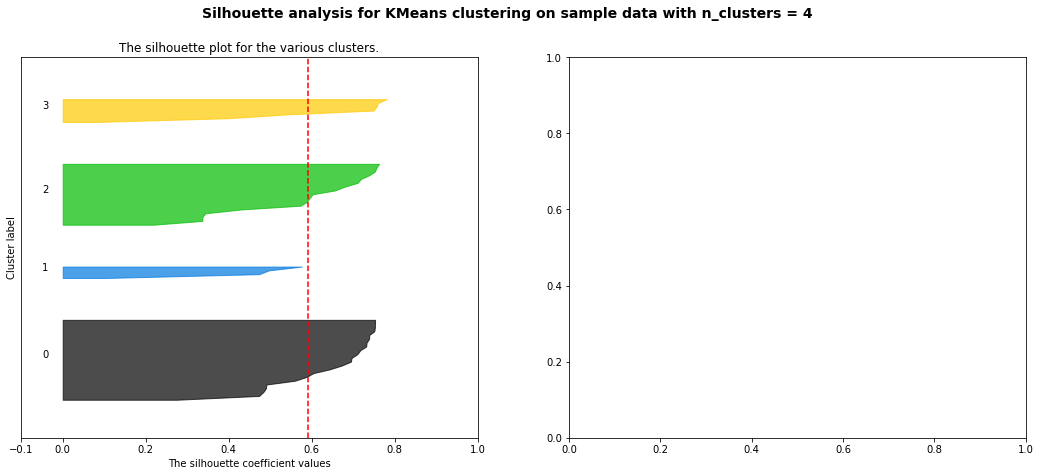

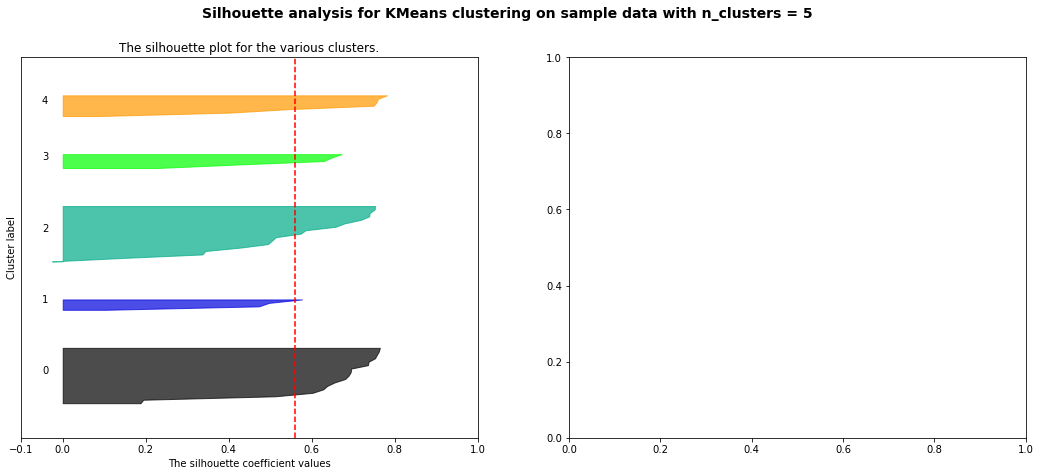

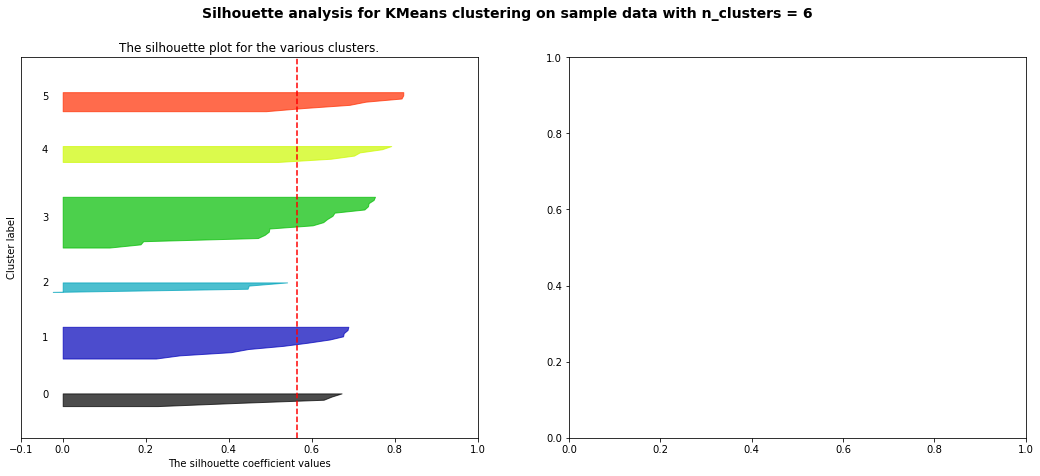

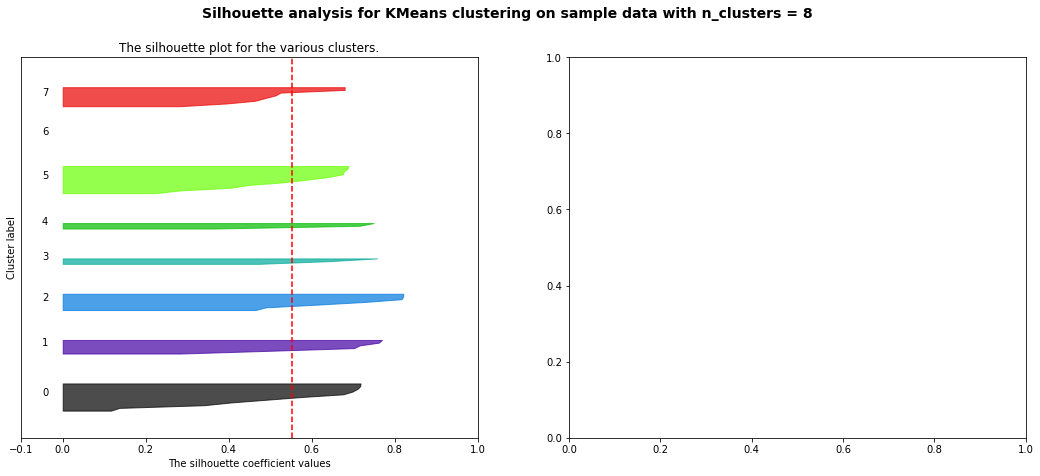

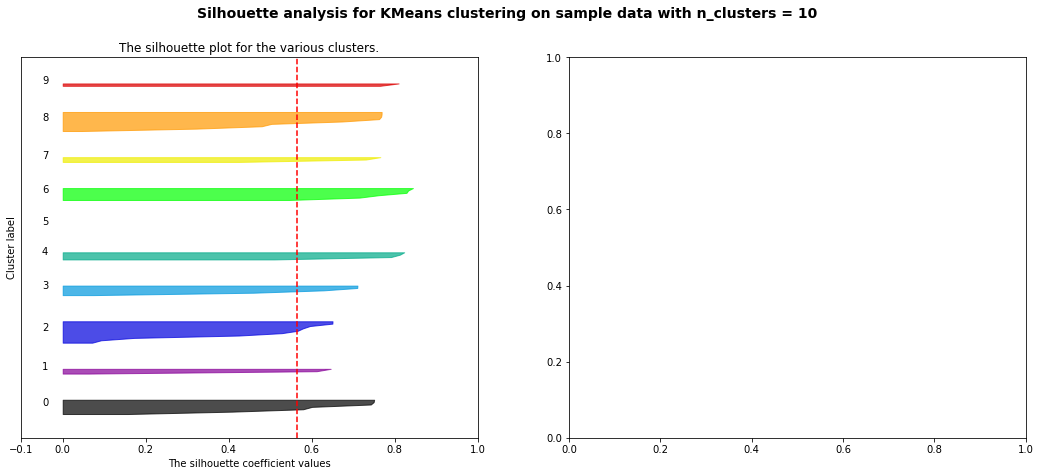

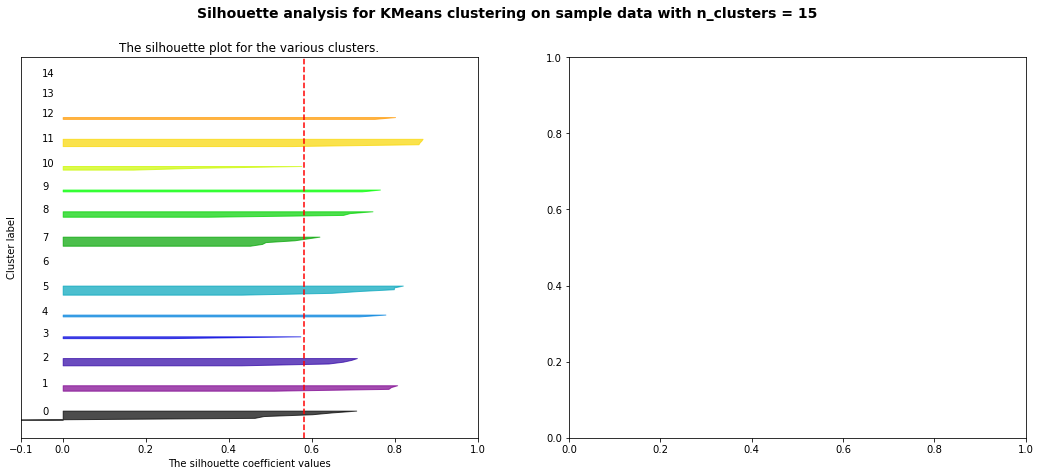

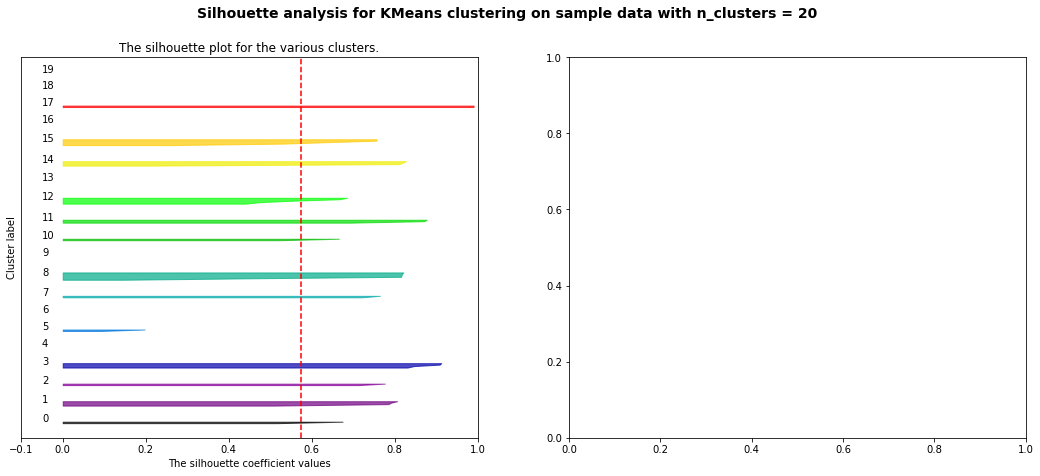

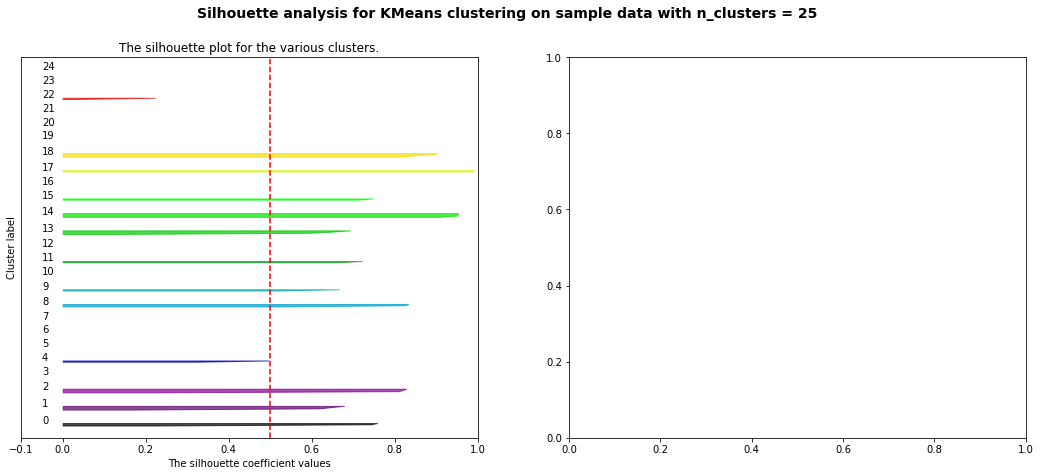

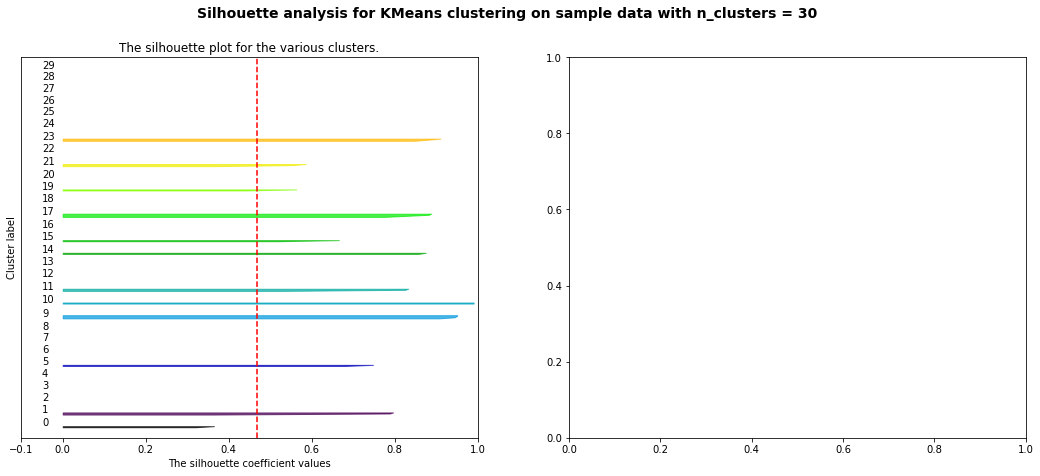

In [37]:
calculate_n_clusters(all_trend_corr_df['pcc_energy'].values.reshape(-1,1))    

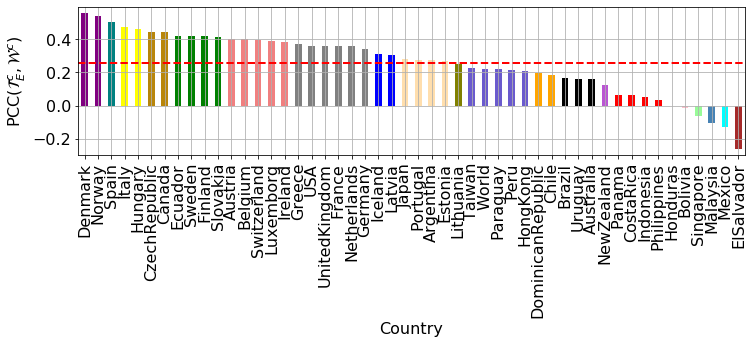

In [38]:
clusterer = KMeans(n_clusters=20, random_state=10)
cluster_labels = clusterer.fit_predict(all_trend_corr_df['pcc_energy'].values.reshape(-1,1))
all_trend_corr_df['energy_clust']= cluster_labels

colors_to_plot= [color_dict[i] for i in all_trend_corr_df.sort_values(by='pcc_energy',ascending=False)['energy_clust']]
all_trend_corr_df['pcc_energy'].sort_values(ascending=False).plot(kind='bar', 
                                                                        grid=True, 
                                                                        figsize=(10,4),
                                                                        color=colors_to_plot);
plt.tight_layout()
plt.xlabel("Country", fontsize = 16)
plt.ylabel('PCC($\mathcal{T}^c_E, \mathcal{W}^c$)', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=all_trend_corr_desc.loc['mean', 'pcc_energy'], color='r', linestyle='--', lw=2)

plt.savefig(os.path.join('figs','pcc_weather_energy.png'))

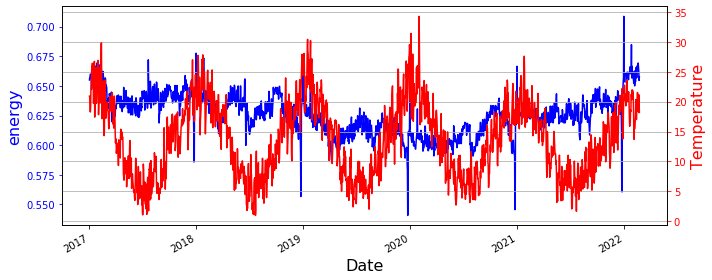

In [39]:
plot_weather_and_song_feature(ranking_features_df, weather_df, 'Australia', 'energy')

### Plot as maps

In [40]:
import geopandas as gpd

In [41]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#correct some name inconsistences
world.loc[4,'name']='USA'
world.loc[143,'name']='UnitedKingdom'
world.loc[17,'name']='DominicanRepublic'
world.loc[153,'name']='CzechRepublic'
world.loc[37,'name']='ElSalvador'
world.loc[136,'name']='NewZealand'
world.loc[34,'name']='CostaRica'
world.loc[128,'name']='Luxemborg'

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,USA,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [42]:
world_with_values= world.merge(all_trend_corr_df.reset_index(), left_on='name', right_on='country')

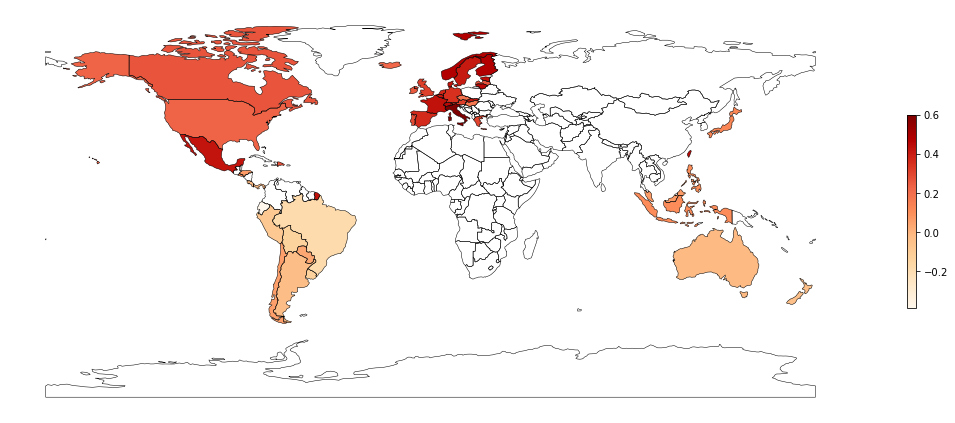

In [43]:
ax=world_with_values.plot(column='pcc_danceability', legend=True, figsize=(15,7), cmap='OrRd',legend_kwds={'shrink': 0.4});
world.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black');
ax.set_axis_off();
plt.tight_layout()
plt.savefig(os.path.join('figs','pcc_weather_danceability_map.png'))

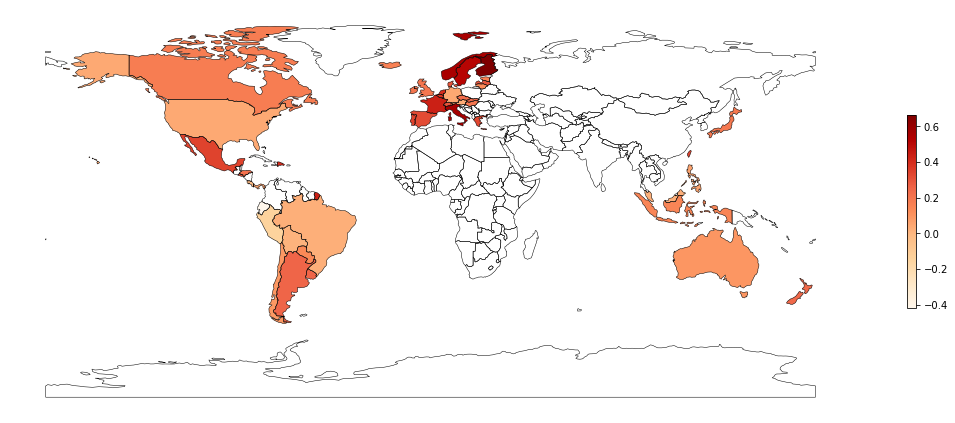

In [44]:
ax=world_with_values.plot(column='pcc_valence', legend=True, figsize=(15,7), cmap='OrRd',legend_kwds={'shrink': 0.4});
world.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black');
ax.set_axis_off();
plt.tight_layout();
plt.savefig(os.path.join('figs','pcc_weather_valence_map.png'))

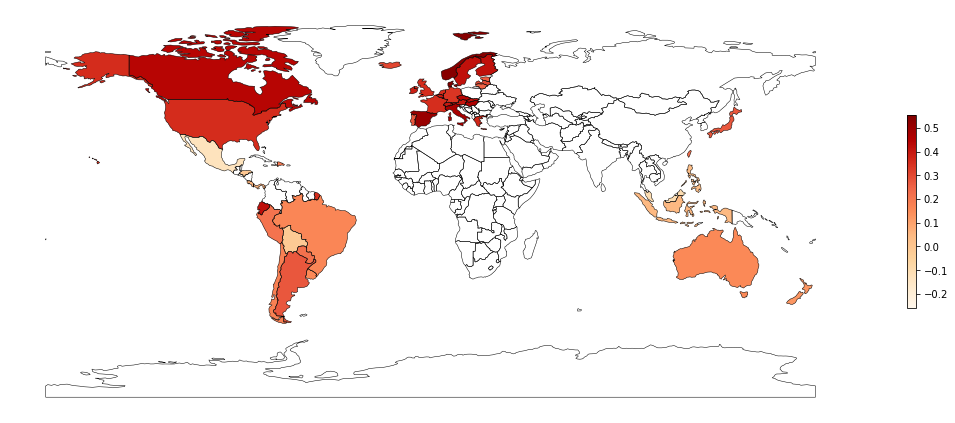

In [45]:
ax=world_with_values.plot(column='pcc_energy', legend=True, figsize=(15,7),cmap='OrRd',legend_kwds={'shrink': 0.4});
world.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black');
ax.set_axis_off();
plt.tight_layout()
plt.savefig(os.path.join('figs','pcc_weather_energy_map.png'))